# Tarea Módulo 4: métodos de aprendizaje no supervisados - Diplomado Data Science
## Profesor: Julio Moyano
### Alumno: Cristóbal Saldías
#### Enunciado Primera parte:
Utilizar la base de datos OnlineRetail.csv para responder lo siguiente:
- 1. Grafiar la cantidad de ordenes (Invoice) por cada día de la semana ¿Qué día se producen la mayor cantidad de ordenes y cuando la menor?
- 2. ¿Cuáles son los 5 países que más gastan en promedio? graficar y tabla.
- 3. Hay items que la empresa entrega de regalo, ¿Cuántos se regalaron?. indicar cantidad por mes.

### Lectura y análisis de la base de datos

In [1]:
# Importacion de librerias que se emplearan
import pandas as pd
import numpy as np
from datetime import datetime, date, time, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import re

# Configuracion de pandas para que no bloque asignaciones masivas
pd.options.mode.chained_assignment = None

# Lectura del dataset y previsualizacion de los datos
df = pd.read_csv("OnlineRetail.csv")
print("=================================================")
print("Tipos de datos por columna")
print(df.dtypes)
print("=================================================")
print("Cantidad de nulos por columna")
print(df.isna().sum())
print("=================================================")
print("Tamaño dataset")
print(df.shape)
print("=================================================")
df.head()

Tipos de datos por columna
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object
Cantidad de nulos por columna
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Tamaño dataset
(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
# conversion a tipos de datos correspondientes
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%Y %H:%M")
print("=================================================")
print("Tipos de datos por columna")
print(df.dtypes)
print("=================================================")
df.head()

Tipos de datos por columna
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Respuesta primera pregunta

In [3]:
# Se crea una nueva columna para registrar el dia que corresponde
df["Dia"] = df["InvoiceDate"].dt.dayofweek
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dia
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2


In [5]:
dfAgrupado =  df.groupby("Dia").agg({
    "InvoiceNo": "count"
})
# Se añade el dia faltante con valor 0 para mas facilidad de registros
dfAgrupado.loc[5] = [0]
dfAgrupado

,InvoiceNo
Dia,
0,95111
1,101808
2,94565
3,103857
4,82193
6,64375
5,0


In [6]:
# Se reemplaza el numero por el nombre del dia
dias = {
    0: "Lunes (monday)",
    1: "Martes (tuesday)",
    2: "Miercoles (wednesday)",
    3: "Jueves (thursday)",
    4: "Viernes (friday)",
    5: "Sabado (saturday)",
    6: "Domingo (sunday)"
}
dfAgrupado["Nombre"] = dfAgrupado.index
dfAgrupado["NombreDia"] = dfAgrupado["Nombre"].apply(lambda x: dias[x])
del dfAgrupado["Nombre"]
dfAgrupado = dfAgrupado.sort_index()
dfAgrupado

,InvoiceNo,NombreDia
Dia,,
0,95111,Lunes (monday)
1,101808,Martes (tuesday)
2,94565,Miercoles (wednesday)
3,103857,Jueves (thursday)
4,82193,Viernes (friday)
5,0,Sabado (saturday)
6,64375,Domingo (sunday)


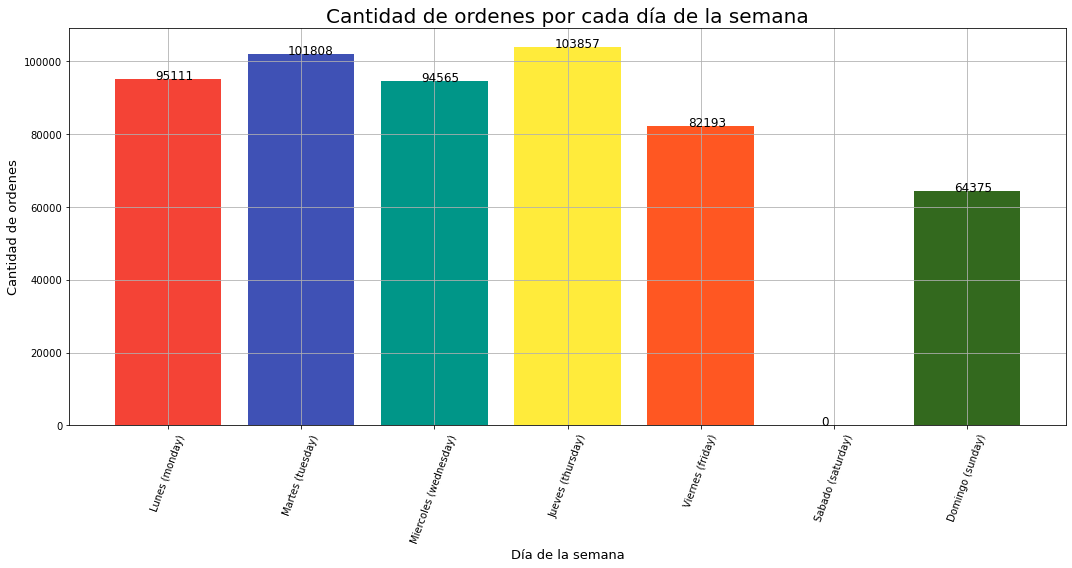

In [7]:
colores = ["#f44336", "#3F51B5", "#009688", "#FFEB3B", "#FF5722", "#607D8B", "#33691E"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(dfAgrupado["NombreDia"], dfAgrupado["InvoiceNo"], color = colores)
plt.xticks(rotation = 70)
plt.xlabel("Día de la semana", fontsize = 13)
plt.ylabel("Cantidad de ordenes", fontsize = 13)
plt.title("Cantidad de ordenes por cada día de la semana", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(dfAgrupado["InvoiceNo"]):
    plt.text(x = index-0.098, y = data, s = f"{data}", fontdict=dict(fontsize = 12))
plt.tight_layout()
plt.show()

#### Comentario:
Se puede apreciar que la mayot cantidad de ordenes se produce los días jueves y martes dentro de la semana. Los días sábados no existen ordenes registradas.
<hr>

### Respuesta segunda pregunta

In [8]:
# Se añade columna de costo total
def CostoTotal(fila):
    return fila["Quantity"] * fila["UnitPrice"]

df["CostoTotal"] = df.apply(CostoTotal, axis = 1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dia,CostoTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,20.34


In [9]:
# Se revisa la cantidad de paises en el dataset
df["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [10]:
# Se genera el dataset agrupado con el primedio de gastos
dfPaisesAgrupados = df.groupby("Country").agg({
    "CostoTotal": "mean"
}).reset_index()
dfPaisesAgrupados

,Country,CostoTotal
0,Australia,108.877895
1,Austria,25.322494
2,Bahrain,28.863158
3,Belgium,19.773301
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,26.499063
7,Cyprus,20.813971
8,Czech Republic,23.590667
9,Denmark,48.247147


In [11]:
dfPaisesAgrupados = dfPaisesAgrupados.sort_values("CostoTotal", ascending=False).head(5)
dfPaisesAgrupados

,Country,CostoTotal
24,Netherlands,120.059696
0,Australia,108.877895
20,Japan,98.716816
32,Sweden,79.211926
9,Denmark,48.247147


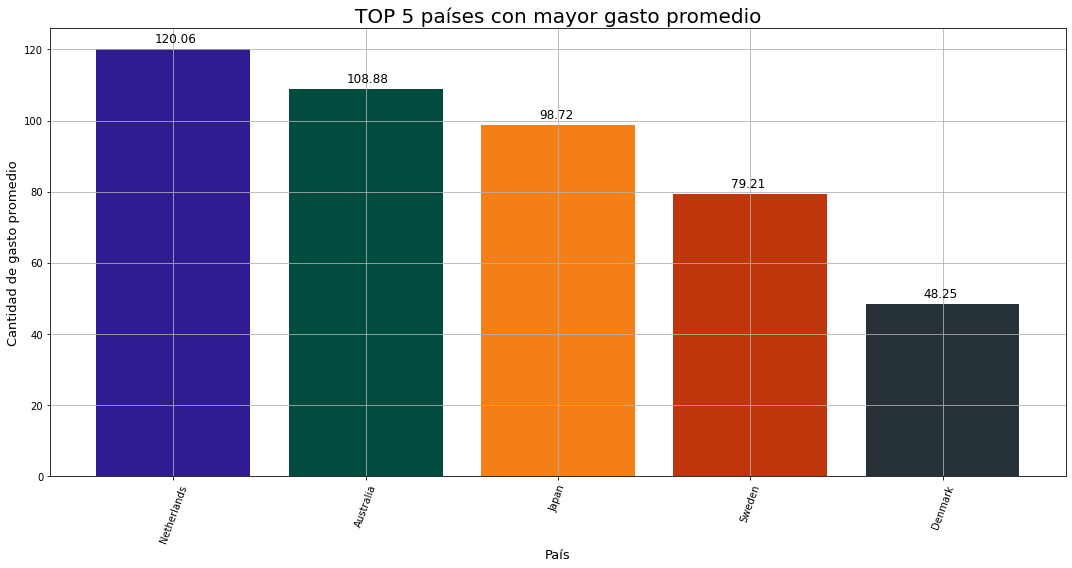

In [12]:
colores = ["#311B92", "#004D40", "#F57F17", "#BF360C", "#263238"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(dfPaisesAgrupados["Country"], dfPaisesAgrupados["CostoTotal"], color = colores)
plt.xticks(rotation = 70)
plt.xlabel("País", fontsize = 13)
plt.ylabel("Cantidad de gasto promedio", fontsize = 13)
plt.title("TOP 5 países con mayor gasto promedio", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(dfPaisesAgrupados["CostoTotal"]):
    plt.text(x = index-0.098, y = data + 2, s = "{0:.2f}".format(data), fontdict=dict(fontsize = 12))
plt.tight_layout()
plt.show()

### Respuesta tercera pregunta

In [20]:
# Se crea una columna asociada a los meses
df["Mes"] = df["InvoiceDate"].dt.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dia,CostoTotal,Mes
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2,20.34,12


In [21]:
dfAgrupadoMes = df.groupby("Mes").agg({
    "Quantity" : "sum"
})
dfAgrupadoMes

,Quantity
Mes,
1,308966
2,277989
3,351872
4,289098
5,380391
6,341623
7,391116
8,406199
9,549817


In [24]:
# Se muestra el nombre del mes que corresponde
dic_meses = {
    1: "Enero (January)",
    2: "Febrero (February)",
    3: "Marzo (March)",
    4: "Abril (April)",
    5: "Mayo (May)",
    6: "Junio (June)",
    7: "Julio (July)",
    8: "Agosto (August)",
    9: "Septiembre (September)",
    10: "Octubre (October)",
    11: "Noviembre (November)",
    12: "Diciembre (December)"
}
dfAgrupadoMes["Nombre"] = dfAgrupadoMes.index
dfAgrupadoMes["NombreMes"] = dfAgrupadoMes["Nombre"].apply(lambda x: dic_meses[x])
del dfAgrupadoMes["Nombre"]
dfAgrupadoMes = dfAgrupadoMes.sort_index()
dfAgrupadoMes

,Quantity,NombreMes
Mes,,
1,308966,Enero (January)
2,277989,Febrero (February)
3,351872,Marzo (March)
4,289098,Abril (April)
5,380391,Mayo (May)
6,341623,Junio (June)
7,391116,Julio (July)
8,406199,Agosto (August)
9,549817,Septiembre (September)


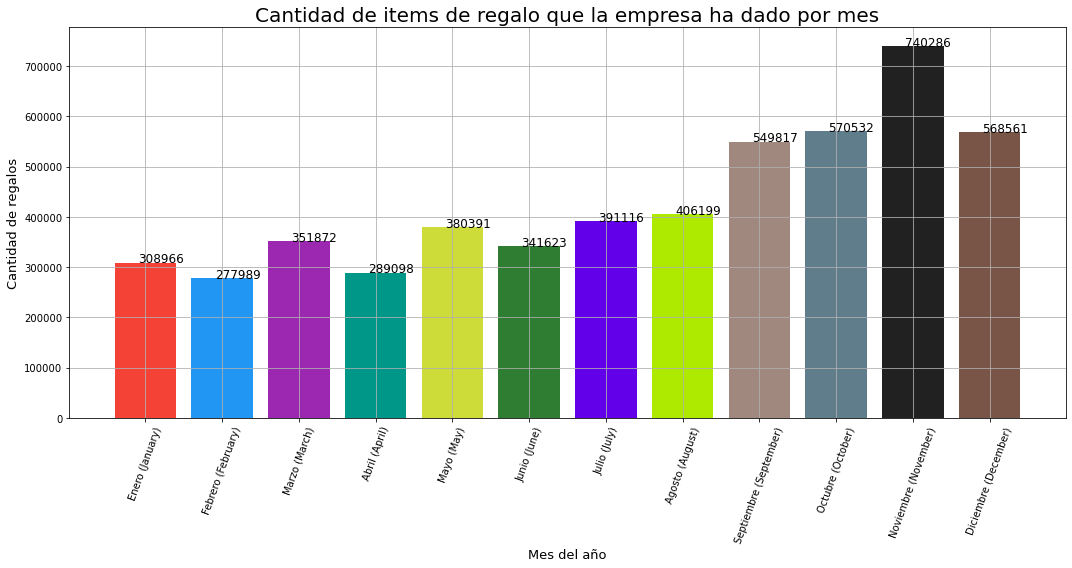

In [26]:
colores = ["#f44336", "#2196F3", "#9C27B0", "#009688", "#CDDC39", "#2E7D32", "#6200EA", "#AEEA00", "#A1887F", "#607D8B", "#212121", "#795548"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(dfAgrupadoMes["NombreMes"], dfAgrupadoMes["Quantity"], color = colores)
plt.xticks(rotation = 70)
plt.xlabel("Mes del año", fontsize = 13)
plt.ylabel("Cantidad de regalos", fontsize = 13)
plt.title("Cantidad de items de regalo que la empresa ha dado por mes", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(dfAgrupadoMes["Quantity"]):
    plt.text(x = index-0.098, y = data + 2, s = data, fontdict=dict(fontsize = 12))
plt.tight_layout()
plt.show()